# BEATS raytracing: Magnetic field profile of the BEATS 3-pole wiggler insertion device
- Data processing courtesy of Jordi Marcos Ruzafa - IDs, Magnets and FEs Section - Accelerators Division, [ALBA SYNCHROTRON LIGHT SOURCE](https://www.cells.es/en/), Cerdanyola, Spain
- Magnetic measurements performed by [Kyma S.p.A.](https://kyma-undulators.com/?lang=en), Trieste, Italy in collaboration with Istituto Nazionale di Fisica Nucleare - [INFN](https://home.infn.it/it/), Rome, Italy 
______________________________________________________

Author:         Gianluca Iori (gianthk.iori@gmail.com)

Created on:   02/02/2024
Last update:  02/02/2024
______________________________________________________


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, AutoMinorLocator

In [2]:
%matplotlib inline

In [17]:
import matplotlib
font = {'weight' : 'normal',
        'size'   : 18}
matplotlib.rc('font', **font)

## Plot of BEATS 3PW magnetic field profile - B[z] VS distance from magnetic center

In [3]:
# read CSV file with Theta-Energy vaules
names = ['z [mm]',	'By meas [T]',	'By sim [T]']
magnetic_field_profile_file = '3PW_magnetic_field_profiles/3PW_FieldProfile_gap11mm.dat'
field_profile = pd.read_csv(magnetic_field_profile_file, sep='\t', names=names, skiprows=[0]) # skiprows=[0, 1, 2, 3, 4, 5]

#### Field profile plot

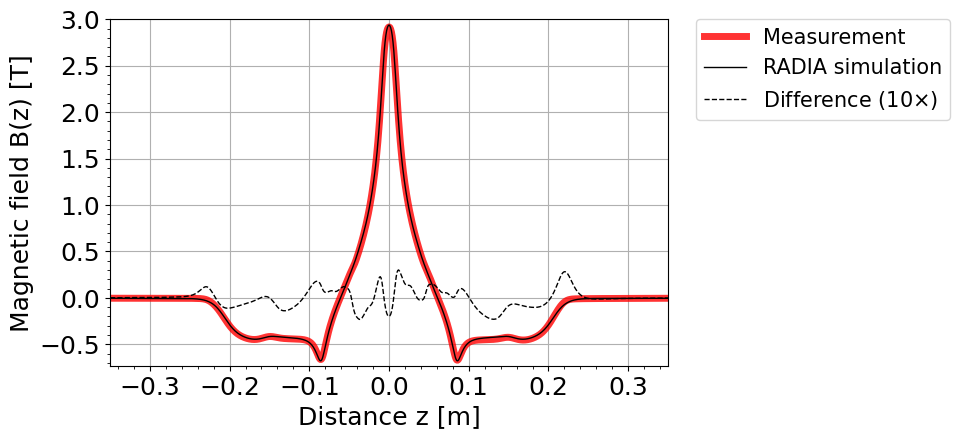

In [44]:
# plot the Energy-Theta relationships
f, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [7.2, 4.5]
plt.plot(1e-3*field_profile['z [mm]'].astype('float'), field_profile['By meas [T]'].astype('float'), '-r', alpha=0.8, linewidth=5)
plt.plot(1e-3*field_profile['z [mm]'].astype('float'), field_profile['By sim [T]'].astype('float'), '-k', linewidth=1)
plt.plot(1e-3*field_profile['z [mm]'].astype('float'), 1e1*(field_profile['By meas [T]'].astype('float')-field_profile['By sim [T]'].astype('float')), '--k', linewidth=1)

# plt.xticks(np.concatenate((np.array([6, 7, 8, 9]), np.arange(10, 75, 5))))
# plt.xticks(np.array([6, 7, 8, 10, 12, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]))
plt.yticks(np.arange(-0.5, 3.5, 0.5))
# plt.xticks(rotation=90)
# plt.yticks(np.arange(0., 1.4, 0.15))
ax.set(xlim=(-0.35, 0.35), ylim=(-0.73, 3))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
# ax.xaxis.set_major_formatter(ScalarFormatter())
# ax.yaxis.set_major_formatter(ScalarFormatter())
plt.xlabel('Distance z [m]')
plt.ylabel('Magnetic field B(z) [T]')
plt.grid(True, which="major")
plt.legend(['Measurement', 'RADIA simulation', r'Difference (10$\times$)'],  bbox_to_anchor=(1.05, 1), borderaxespad=0., loc='upper left', fontsize='small')
f.savefig("BEATS_3PW_FieldProfile_gap11mm.png", bbox_inches='tight', dpi=600)